In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

log = lambda x: np.log(x+0j)
sqrt = lambda x: np.sqrt(x+0j)

In [2]:
# Input data from PDG 2023
GF = 1.1663788e-5 #GeV-2
mZ = 91.1876 #GeV
mtau = 1.77686 #GeV
t = mtau**2/mZ**2
prefactor = 2**0.5/4*mZ**2*GF #(g/4cW)^2
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
s2Weff = 0.23155 #\sin^2\theta_W with 1-loop corrections
c2Weff = 1-s2Weff
c = 1-4*s2W
aem = 1/137.035999180
aem_mZ = 1/127.951

Gammatau_SM = 0.08377 #GeV
Gammahad_SM = 1.7408565063298496 #GeV
Gammatau_exp = 0.08408 #GeV
Gammatau_err = 0.00022 #GeV
# arXiv:1912.02067 Table B.13
Rtau_exp = 20.7644
Rtau_err = 0.0448

Lambda = 1000 #GeV
mu = 4*np.pi*Lambda

In [3]:
F1Afin: complex = mtau**2/(32*np.pi**2*Lambda**2)*(1+log(-mu**2/mZ**2))

F1Vfin = c*F1Afin

def Ftaufin(mphi) -> complex:
    return -mtau**2/(64*np.pi**2*Lambda**2*(mtau**2-mphi**2)**2)*(3*mtau**4-4*mphi**2*mtau**2+mphi**4+2*mphi**2*(mphi**2-mtau**2)*log(mtau**2/mphi**2)-2*(mtau**2-mphi**2)**2*log(mtau**2/mu**2))

def F1Dfin(mphi: float) -> complex:
    def h(x):
        if x < 0.5:
            return (1-4*x**2)**0.5*log((1+(1+4*x**2)**0.5)/(2*x))
        else:
            return -(4*x**2-1)**0.5*np.arctan(4*x**2-1)
    return c*mtau**2/(32*np.pi**2*Lambda**2*mZ**2*mtau**2)*((mphi**4-2*mphi**2*mtau**2)*log(mphi**2/mtau**2)+2*mtau**4*log(-mtau**2/mZ**2)-2*mphi**2*(mtau**2+mphi**2*h(mtau/mphi)))

deltaFA = lambda mphi: F1Afin + Ftaufin(mphi)
deltaFV = lambda mphi: F1Vfin + Ftaufin(mphi)

In [4]:
Fphim = -mtau**2*(1+log(mu**2/mtau**2))/(4*np.pi**2*Lambda**2)

def Ftaum(mphi):
    return mtau**2*(mphi**2/(mphi**2-mtau**2)*log(mtau**2/mphi**2)-1+log(mtau**2/mu**2))/(16*np.pi**2*Lambda**2)

In [5]:
def deltaGamma_loop(mphi: float) -> float:
    return prefactor*mZ/(6*np.pi)*(1-4*t)**0.5*(c*deltaFV(mphi).real*(1+2*t)-deltaFA(mphi).real*(1-4*t)+3*c*F1Dfin(mphi).imag+0.5*(2*Ftaum(mphi)-Fphim)/(1-4*t))

In [8]:
def Rtau(ctau, mphi):
    return (Gammahad_SM/(Gammatau_SM + ctau**2*deltaGamma_loop(mphi))).real

In [12]:
Atau_SM = 0.1468 # PDG Table 10.5 (A_e = A_tau)
Atau_exp = 0.143
Atau_err = 0.004

In [13]:
def Atau_phi(mphi):
    return 2*(c**2-1)/(c**2+1)**2*(c*deltaFA(mphi).real+deltaFV(mphi).real)-3*(c**-1)/(c**2+1)**2/(1-mtau**2/mZ**2)*F1Dfin(mphi).imag

In [14]:
def Atau(ctau, mphi):
    return Atau_SM + ctau**2*Atau_phi(mphi)

In [18]:
def chi2(ctau, mphi):
    return (Atau(ctau, mphi)-Atau_exp)**2/Atau_err**2 + (Rtau(ctau, mphi)-Rtau_exp)**2/Rtau_err**2

In [23]:
import scipy.optimize

In [25]:
m = scipy.optimize.minimize_scalar(lambda ctau: chi2(ctau, 1))

In [26]:
m.x

19.557752144462448

In [27]:
mphi_list = [10**x for x in np.linspace(-3, 1, 500)]
ctau_optim = [scipy.optimize.minimize_scalar(lambda ctau: chi2(ctau, mphi)).x for mphi in mphi_list]

Text(0, 0.5, '$|c_\\tau|$')

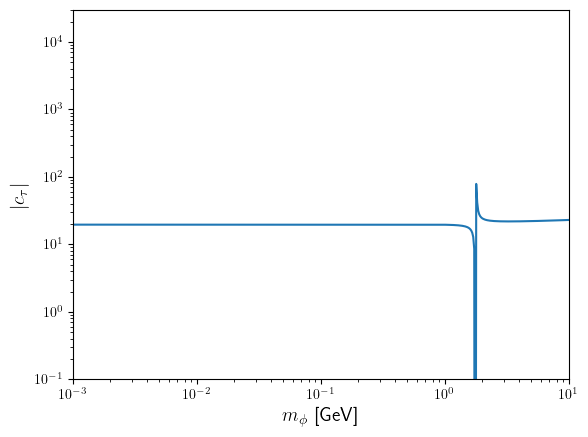

In [30]:
plt.loglog(mphi_list, ctau_optim)
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)

This is the best fit of $c_\tau$ to $R_\tau$ and $A_\tau$ for each value of $m_\phi$